In [1]:
pip install opencv-python-headless matplotlib

   ---------------------------------------- 0.0/38.5 MB ? eta -:--:--
   ---------------------------------------- 0.1/38.5 MB 1.7 MB/s eta 0:00:24
   ---------------------------------------- 0.2/38.5 MB 2.3 MB/s eta 0:00:17
   ---------------------------------------- 0.3/38.5 MB 2.1 MB/s eta 0:00:18
   ---------------------------------------- 0.4/38.5 MB 2.1 MB/s eta 0:00:19
   ---------------------------------------- 0.4/38.5 MB 1.9 MB/s eta 0:00:21
    --------------------------------------- 0.5/38.5 MB 2.0 MB/s eta 0:00:20
    --------------------------------------- 0.7/38.5 MB 2.2 MB/s eta 0:00:18
    --------------------------------------- 0.8/38.5 MB 2.2 MB/s eta 0:00:17
    --------------------------------------- 0.8/38.5 MB 2.2 MB/s eta 0:00:17
    --------------------------------------- 0.8/38.5 MB 2.2 MB/s eta 0:00:17
    --------------------------------------- 0.8/38.5 MB 2.2 MB/s eta 0:00:17
    --------------------------------------- 0.8/38.5 MB 2.2 MB/s eta 0:00:17
    --

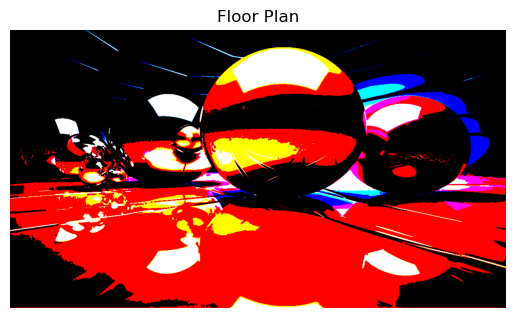

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def load_image(image_path):
    """
    Load the 3D image (depth map) from the given path.
    """
    image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
    if image is None:
        raise ValueError("Could not load the image.")
    return image

def preprocess_image(image):
    """
    Preprocess the image (e.g., normalize, resize).
    """
    # Normalize the image to the range [0, 1]
    image = image / np.max(image)
    return image

def convert_to_floor_plan(image):
    """
    Convert the 3D image (depth map) to a 2D floor plan.
    """
    # Thresholding to create a binary image (assuming walls and structures have higher depth values)
    _, floor_plan = cv2.threshold(image, 0.5, 1.0, cv2.THRESH_BINARY)
    return floor_plan

def postprocess_floor_plan(floor_plan):
    """
    Postprocess the floor plan image to enhance the details.
    """
    # Convert to uint8
    floor_plan = (floor_plan * 255).astype(np.uint8)
    
    # Optionally, apply morphological operations to clean up the image
    kernel = np.ones((3, 3), np.uint8)
    floor_plan = cv2.morphologyEx(floor_plan, cv2.MORPH_CLOSE, kernel)
    
    return floor_plan

def save_floor_plan(floor_plan, output_path):
    """
    Save the floor plan image to the specified path.
    """
    cv2.imwrite(output_path, floor_plan)

def display_image(image, title="Image"):
    """
    Display the image using matplotlib.
    """
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

def main():
    # Path to the 3D image (depth map)
    image_path = r"C:\Users\pooja\Downloads\3d-2.jpg"
    output_path = r"C:\Users\pooja\Downloads\floor_plan.png"
    
    # Load the image
    image = load_image(image_path)
    
    # Preprocess the image
    image = preprocess_image(image)
    
    # Convert to floor plan
    floor_plan = convert_to_floor_plan(image)
    
    # Postprocess the floor plan
    floor_plan = postprocess_floor_plan(floor_plan)
    
    # Save the floor plan
    save_floor_plan(floor_plan, output_path)
    
    # Display the floor plan
    display_image(floor_plan, title="Floor Plan")

if __name__ == "__main__":
    main()